In [1]:
install.packages("prob")
library(prob)
library(MASS)

package 'prob' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\21jun\AppData\Local\Temp\Rtmp6dWZ5U\downloaded_packages


Warning message:
"package 'prob' was built under R version 3.6.3"
Loading required package: combinat


Attaching package: 'combinat'


The following object is masked from 'package:utils':

    combn


Loading required package: fAsianOptions

Warning message:
"package 'fAsianOptions' was built under R version 3.6.3"
Loading required package: timeDate

Loading required package: timeSeries

Warning message:
"package 'timeSeries' was built under R version 3.6.3"
Loading required package: fBasics

Warning message:
"package 'fBasics' was built under R version 3.6.3"
Loading required package: fOptions

Warning message:
"package 'fOptions' was built under R version 3.6.3"

Attaching package: 'prob'


The following objects are masked from 'package:base':

    intersect, setdiff, union


Warning message:
"package 'MASS' was built under R version 3.6.2"


## 문제1

In [2]:
S <- rolldie(2)

In [3]:
A <- subset(S, ((X1+X2)==3) | ((X1+X2)==6))

In [4]:
A

,X1,X2
,<int>,<int>
2,2,1
5,5,1
7,1,2
10,4,2
15,3,3
20,2,4
25,1,5


In [5]:
nrow(A) / nrow(S)

[1] 0.1944444

## 문제2

In [6]:
S <- c(1:30)

In [7]:
A <- subset(S, (S%%4==0)|(S%%9==0))

In [8]:
A

[1]  4  8  9 12 16 18 20 24 27 28

In [9]:
length(A) / length(S)

[1] 0.3333333

## 문제3

In [10]:
makePocket <- function(x) {
    
    p <- c()
    # white balls
    for (i in 1:x)
        p <- c(p, "White")
    
    # black balls
    for (i in 1:(5-x))
        p <- c(p, "Black")
    pocket <- data.frame(ball=p)
    
    return (pocket)
}

In [11]:
countPocket <- function(pocket, color) {
    return (sum(pocket$ball == color))
}

In [12]:
pocket1 = makePocket(1)
pocket2 = makePocket(2)
pocket3 = makePocket(3)

In [13]:
pickWhite = (countPocket(pocket1, "White") + 
             countPocket(pocket2, "White") +
             countPocket(pocket3, "White")
             )

In [14]:
S <- nrow(pocket1) + nrow(pocket2) + nrow(pocket3)

In [15]:
# 하얀공이 나올 확률
A1 = as.fractions(pickWhite / S); A1

[1] 2/5

In [16]:
# 3번 주머니를 선택하고 하얀공이 나올 확률
A2 = 1/3 * as.fractions(countPocket(pocket3, "White")/nrow(pocket3)); A2

[1] 1/5

In [17]:
# 하얀 공이 추출되었다는 조건하에서 추출된 하얀 공이 3번 주머니에서 나왔을 확률
A2/A1

[1] 1/2

## 문제4

In [18]:
age <- c(20,30,40,50,60)

In [19]:
prior <- c(0.15, 0.24, 0.26, 0.2, 0.15); prior

[1] 0.15 0.24 0.26 0.20 0.15

In [20]:
cond <- c(0.58, 0.52, 0.04, 0.4, 0.35); cond

[1] 0.58 0.52 0.04 0.40 0.35

In [21]:
# A 후보의 지지율
tot <- sum(prior * cond); tot

[1] 0.3547

In [22]:
post <- as.fractions((prior*cond)/tot); post

[1]  870/3547 1248/3547  104/3547  800/3547  525/3547

In [23]:
# 지지자 연령대별 비율
df = data.frame(age=age, post=post); df

age,post
<dbl>,<fractins>
20,0.24527770
30,0.35184663
40,0.02932055
50,0.22554271
60,0.14801240


## 문제 5

In [24]:
S <- rolldie(3)

In [26]:
OneCount <- function(x) sum(x==1)

In [45]:
X <- apply(S, 1, OneCount)

In [48]:
freq <- table(X)

In [49]:
prob <- freq/length(X) 

In [51]:
as.fractions(prob)

X
      0       1       2       3 
125/216   25/72    5/72   1/216 

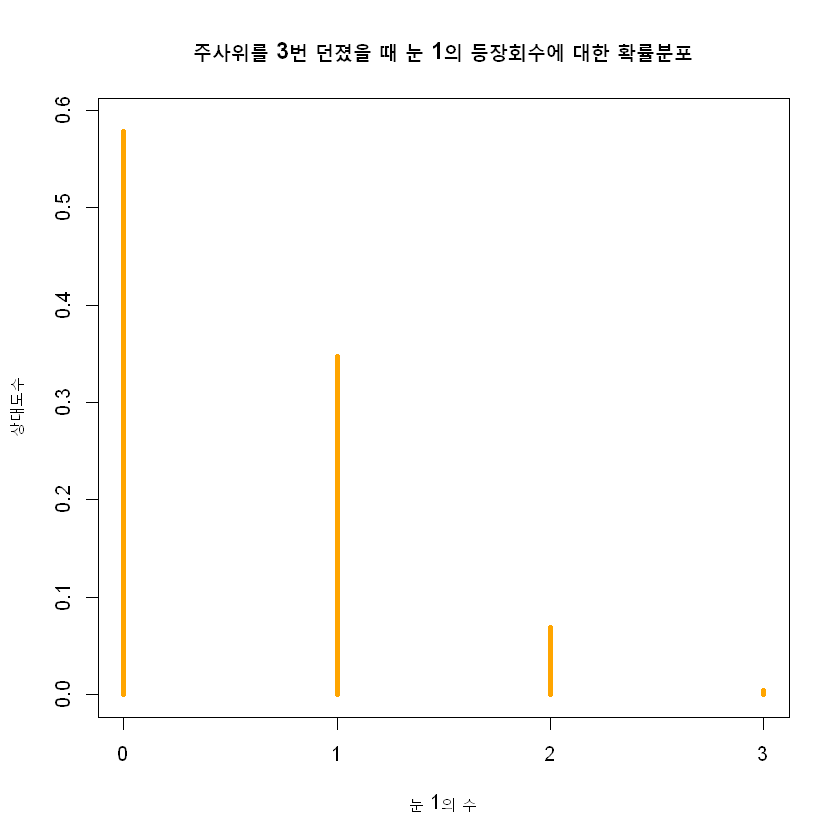

In [58]:
plot(prob, main="주사위를 3번 던졌을 때 눈 1의 등장회수에 대한 확률분포", 
     xlab="눈 1의 수",
     ylab="상대도수", 
     type="h",
     col="Orange", ylim=c(0, max(prob)+0.01), lwd=4)

## 문제6

In [76]:
c = 1/36
fx <- function(x) {c*(9-x^2)}

integrate(fx, -3, 3)

1 with absolute error < 1.1e-14

In [85]:
# P(X>=2)  == 1 - P(-3<x<2)
1 - integrate(fx,-3, 2)$value

[1] 0.07407407

## 문제7

In [161]:
S <- rolldie(2, makespace =TRUE)

In [186]:
# (1)
X <- S$X1 + S$X2
freq <- table(X)
prob <- freq/length(X)
Xt <- as.fractions(prob)
Xt

X
   2    3    4    5    6    7    8    9   10   11   12 
1/36 1/18 1/12  1/9 5/36  1/6 5/36  1/9 1/12 1/18 1/36 

In [187]:
# (2)
Y <- abs(S$X1 - S$X2)
freq <- table(Y)
prob <- freq/length(Y)
Yt <- as.fractions(prob)
Yt

Y
   0    1    2    3    4    5 
 1/6 5/18  2/9  1/6  1/9 1/18 

In [217]:
# (3) 확률변수 X와 Y의 결합확률분포를 구하시오. 
as.matrix(Xt) %*% t(as.matrix(Yt))

,0,1,2,3,4,5
2,0.004629630,0.007716049,0.00617284,0.004629630,0.003086420,0.001543210
3,0.009259259,0.015432099,0.01234568,0.009259259,0.006172840,0.003086420
4,0.013888889,0.023148148,0.01851852,0.013888889,0.009259259,0.004629630
5,0.018518519,0.030864198,0.02469136,0.018518519,0.012345679,0.006172840
6,0.023148148,0.038580247,0.03086420,0.023148148,0.015432099,0.007716049
7,0.027777778,0.046296296,0.03703704,0.027777778,0.018518519,0.009259259
8,0.023148148,0.038580247,0.03086420,0.023148148,0.015432099,0.007716049
9,0.018518519,0.030864198,0.02469136,0.018518519,0.012345679,0.006172840
10,0.013888889,0.023148148,0.01851852,0.013888889,0.009259259,0.004629630
11,0.009259259,0.015432099,0.01234568,0.009259259,0.006172840,0.003086420
